# Week 2: Introduction to Statistical Modeling and Linear Regression

In this notebook, we will implement a **linear regression model**, as presented in the slides. <br>
The notebook is structured as follows: <br>
- 1. [Data Cleaning](#1-data-cleaning-and-preprocessing)
- 2. [Assumptions of Linear Regression](#assumptions-of-linear-regression)
        - 2.1 [Linearity](#1-linearity)
        - 2.2 [Low Correlation](#2-low-correlation)
- 3. [Simple Linear Regression](#simple-linear-regression)
        - 3.1 [Exploratory mode](#exploratory-mode)
        - 3.2 [Prediction mode](#prediction-mode)
        - 3.3 [Model Evaluation](#model-evaluation)
- 4. [Multiple Linear Regression](#multiple-linear-regression)

Some sources of this notebook: <br>
[An Introduction to Statistical Learning with Applications in Python](https://www.statlearning.com/) <br>
[Medium tutorial](https://ianclemence.medium.com/day-23-implementing-linear-regression-in-python-09e832550e40) <br>
[Datacamp tutorial](https://www.datacamp.com/tutorial/sklearn-linear-regression?utm_source=chatgpt.com) <br>

We will start by importing all the necessary libraries and modules. <br>
> Reminder: If you lack some of the necessary libraries, you can install them directly in this notebook. Create a new code cell and type !pip install < library-name >. Remember to include the exclamation mark!

In [367]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

We will use the Boston housing situation dataset.
While you can download the file and open it with `pandas`' built-in `csv` function, here we will load it with `ISLP`, the learning module provided by the authors of the book [An Introduction to Statistical Learning with Applications in Python](https://www.statlearning.com/).  The `Boston` dataset records  `medv`  (median house value) for $506$ neighborhoods around Boston.  We will build regression models to predict  `medv`  using $13$ predictors such as  `rmvar`  (average number of rooms per house), `age`  (proportion of owner-occupied units built prior to 1940), and  `lstat`  (percent of households with low socioeconomic status).  

In [368]:
from ISLP import load_data
boston=load_data("Boston")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### 1. Data Cleaning and Preprocessing

This is the moment to do some exercises about **data cleaning**.\
Let's round the "rm" value to 2 places after the comma:

In [369]:
boston[['rm']] = np.round(boston[['rm']],2)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.58,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.42,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.18,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,7.00,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.15,54.2,6.0622,3,222,18.7,5.33,36.2


We already talked about the problem of empty values. Let's check if there are any.

In [370]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

OK, we are good to go!
> Hint: We already talked last time about the possibility of dropping empty values. If you want to analyze a dataset that contains empty values, an useful approach is **replacing them with the mean or with the mode**.

It looks like our dataset is in good enough state. For our **simple** linear regression exercise, we will use the variables "lstat" and "medv", representing respectively the percentage of households with low income and the median house value.

In [371]:
X = boston[['lstat']]  # independent variable(s)
y = boston['medv']   # dependent variable
print(X)

     lstat
0     4.98
1     9.14
2     4.03
3     2.94
4     5.33
..     ...
501   9.67
502   9.08
503   5.64
504   6.48
505   7.88

[506 rows x 1 columns]


## 2. Assumptions of linear regression
Let's first perform some exploratory data analysis to verify that the assumptions of linear regression are respected. We will be able to assess whether the choice of this model makes sense.
We will focus on the two variables that we will use for simple linear regression: Low income households and median house value. We read as X and y respectively in the previous notebook.
### 2.1 Linearity

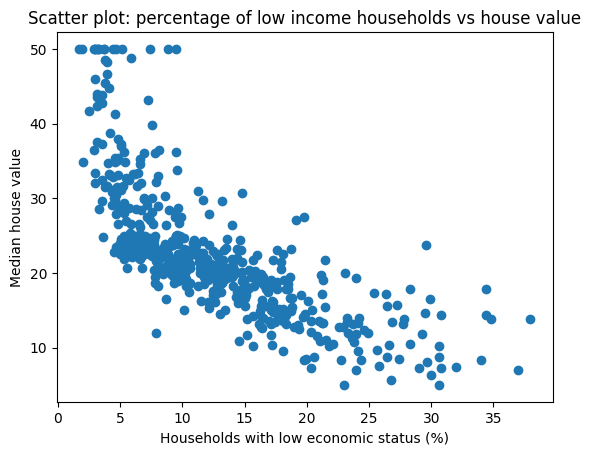

In [372]:
# Simple scatter plot
plt.scatter(X, y)
plt.xlabel('Households with low economic status (%)')
plt.ylabel('Median house value')
plt.title('Scatter plot: percentage of low income households vs house value')
plt.show()

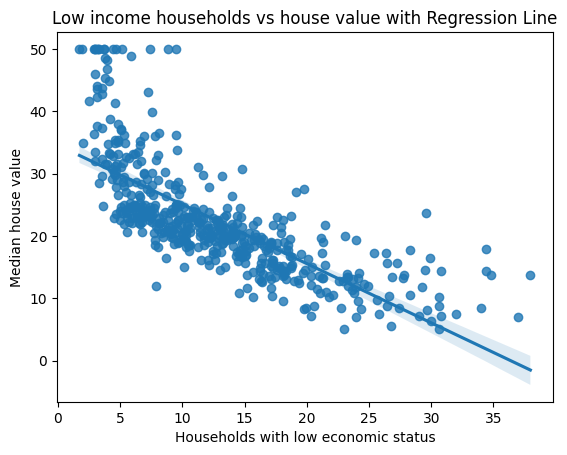

In [373]:
# Add regression line (using seaborn) for better visualization
sns.regplot(x='lstat', y='medv', data=boston)
plt.xlabel('Households with low economic status')
plt.ylabel('Median house value')
plt.title('Low income households vs house value with Regression Line')
plt.show()

### 2.2. Low Correlation
Do it as an exercise!
(If in doubt, check labs from last week).

## 3. Simple Linear Regression
### 3.1 Inference mode

We will first fit a model on the whole dataset, just for you to better understand linear regression. Later, we will **split the dataset** and talk about why splitting the dataset is important.
We have included a simple loading function `load_data()` in the `ISLP` package:

In [374]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Define features and target variable
X = boston[['lstat']]  # independent variable(s)
y = boston['medv']   # dependent variable

print(X)

     lstat
0     4.98
1     9.14
2     4.03
3     2.94
4     5.33
..     ...
501   9.67
502   9.08
503   5.64
504   6.48
505   7.88

[506 rows x 1 columns]


> **Reminder:** <br>
> - $\beta_0$:  intercept (value of y when x = 0). <br>
> - $\beta_1$:  slope (how much y changes for 1 unit increase in x).

Important: We use `sklearn`, which is more intuitive and more widely used in data science compared to other libraries used for linear regression (such as `statsmodels`). Differently from `statsmodels`, in `sklearn` the intercept is included by default. You can check this by running `print(model.fit_intercept)`.

In [376]:
# Create and fit the model
model = LinearRegression()
#model.fit(X_train, y_train)
model.fit(X, y)

LinearRegression()

The model is fitted. Of course, for now, this does not tell us anything. Now you can:
- print the parameters and the evaluation metrics, to be able to evaluate your model and your data
- plot the linear regression line

In [377]:
# Check for intercept (always True by default in sklearn LinearRegression())
print(model.fit_intercept)

True


In [378]:
# Display the model parameters
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Coefficient (β₁): {model.coef_[0]:.2f}")

Intercept (β₀): 34.55
Coefficient (β₁): 0.00


Keep in mind that when intercept is not automatically include, you need to compute it manually. In `statsmodels`, you add a columns of 1s to your dataframe to include intercept.
> Just because it happens "in the backstage", it does not mean that you can ignore it! Intercept is a crucial part of your model, and you have to be aware of its presence and its meaning.

ValueError: x and y must be the same size

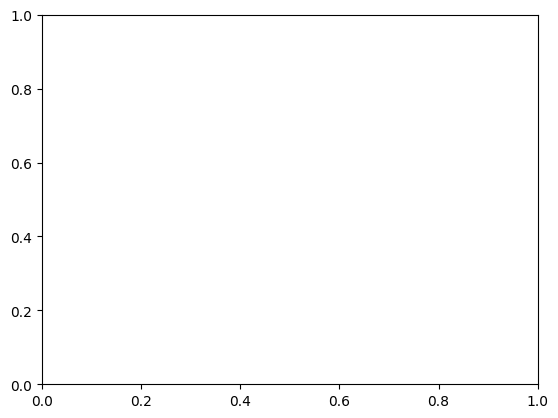

In [379]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Linear regression line') # as you only have 2 variables, you can use them to plot a regression line
plt.xlabel('Low income households')
plt.ylabel('median house value')
plt.title('Exploratory Linear Regression')
plt.legend()
plt.show()

### 3.2 Prediction mode
Great - you understood the principles of **simple linear regression**!
However, as we learned in the first week of lectures, advanced data analysis involves the switch **from descriptive to predictive**.
While we can use linear regression to analyze our dataset, what this model does is **predicting values**. To assess the quality of the model, we need therefore to set aside a section of the dataset, and test the model on it. As you can imagine, testing the model on data that **the model has already seen** would not be reliable. In fact, if we use all of our data for traning, the model will tend to **fit the data as well as possible**, and thus be less reliable. <br>
<br>
We split the model into a **training set** (80%) and a **test set** (20%). And yes, there is a built-in function in `sklearn` for that too!

In [ ]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

Training Set Size: (404, 1)
Testing Set Size: (102, 1)


In [ ]:
# Create and fit the model on the training data
predictive_model = LinearRegression()
predictive_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(predictive_model.fit_intercept)

True


In [ ]:
# Display the model parameters
print(f"Intercept (β₀): {predictive_model.intercept_:.2f}")
print(f"Slope (β₁): {predictive_model.coef_[0]:.2f}")

Intercept (β₀): 34.84
Slope (β₁): -0.97


### 3.3 Model evaluation

In [ ]:
# Predict prices for the test set
predictions = predictive_model.predict(X_test)

# Compare predicted and actual prices
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})
print("\nActual vs. Predicted Prices:\n", comparison)


Actual vs. Predicted Prices:
      Actual  Predicted
173    23.6  26.099510
274    32.4  31.425096
491    13.6  17.371736
72     22.8  29.501699
452    16.1  18.144961
..      ...        ...
412    17.9   1.617283
436     9.6  17.391067
411    17.2  14.327164
86     22.5  22.407362
75     21.4  26.196164

[102 rows x 2 columns]


In [ ]:
residuals = y_test - predictions
print(residuals)

173    -2.499510
274     0.974904
491    -3.771736
72     -6.701699
452    -2.044961
         ...    
412    16.282717
436    -7.791067
411     2.872836
86      0.092638
75     -4.796164
Name: medv, Length: 102, dtype: float64


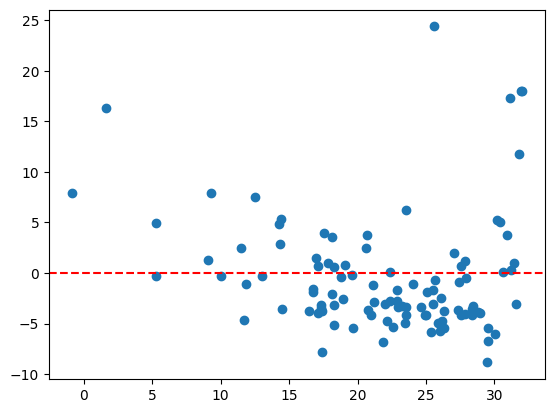

In [ ]:
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')

Quick reminder about the evaluation metrics:

`Mean squared error`: it's the average squared error and it measures **how well the model fits your data**. The lower, the better! <br>
<br>
`Root mean squared error`: it's in the same units as `y`, so it's **easier to interpret** compared to MSE. The lower, the better! <br>
<br>
`Residual standard error`: tells you the deviation of points from regression line, more easily said: it tells you how far the data points are from the line. The lower, the better! <br>
<br>
`R squared`: tells you **how much the predictor explains y**. It is in a **range from 0 to 1**. The closer it is to 1, the better your model fits. <br>
> However, keep in mind that a very high R squared value could mean that your model is **overfitting**!

In [ ]:
# Calculate and print MSE.
mse = mean_squared_error(y_test, predictions)
print(f"Mean squared error: {mse:.4f}")


# Calculate and print Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root mean squared error: {rmse:.4f}")

# Calculate and print Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.4f}")

# Calculate and print R-squared (Coefficient of Determination)
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2:.4f}")

Mean squared error: 33.5195
Root mean squared error: 5.7896
Mean Absolute Error: 4.1848
R-squared: 0.5429


In [ ]:
# Calculate Residual Standard Error (not built-in)
# Number of observations and predictors
n = X.shape[0]
p = X.shape[1]

# Residual Standard Error
RSE = np.sqrt(np.sum(residuals**2) / (n - p - 1))
print("Residual Standard Error:", RSE)

Residual Standard Error: 2.604557214758035


## 4. Multiple Linear Regression
We will now expand our analyses and add the `age` variable.

In [ ]:
print(boston.head())

      crim    zn  indus  chas    nox    rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.58  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.42  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.18  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  7.00  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.15  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


In [ ]:
print(boston["age"])

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: age, Length: 506, dtype: float64


Good news! Once again, `sklearn` handles a lot of things for us. We will just need to add `age` to our `X` predictor, and then we will use the same methods as for simple linear regression.

In [ ]:
X_multiple = boston[['lstat', 'age']]  # independent variable(s)
y = boston['medv']   # dependent variable

In [ ]:
print(X_multiple)

     lstat   age
0     4.98  65.2
1     9.14  78.9
2     4.03  61.1
3     2.94  45.8
4     5.33  54.2
..     ...   ...
501   9.67  69.1
502   9.08  76.7
503   5.64  91.0
504   6.48  89.3
505   7.88  80.8

[506 rows x 2 columns]


In [ ]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


In [ ]:
# Create and fit the model
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)

LinearRegression()

In [ ]:
print("Intercept:", model_multiple.intercept_)
print("Coefficients:", model_multiple.coef_)

Intercept: 33.2227605317929
Coefficients: [-1.03206856  0.03454434]


In **multiple linear regression**, a more accurate evaluation metric is **adjusted R squared**. This metrics adjusts R squared to the number of **observations** and of **predictors**. The more variables you add, the more important this metric is.

In [ ]:
# Calculate R²
r2 = r2_score(y_test, predictions)

# Calculate adjusted R²
n = X.shape[0]  # number of samples
p = X.shape[1]  # number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R²: {r2:.3f}")
print(f"Adjusted R²: {adjusted_r2:.3f}")

R²: 0.543
Adjusted R²: 0.542


For example, let's compute multiple linear regression with **all the variables present in the dataset**.

In [ ]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.58,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.42,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.18,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,7.00,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.15,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
# Let's create a new df without the 'medv' column
boston_without_medv = boston.drop('medv', axis=1) # axis=0 for dropping rows
boston_without_medv

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.58,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.42,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.18,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,7.00,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.15,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.59,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.98,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.79,89.3,2.3889,1,273,21.0,6.48


In [ ]:
# Initialize X and y
X_all = boston_without_medv
y_all = boston["medv"]
#print(X_all)

In [ ]:
# Split dataset in train and test set
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print("Training Set Size:", X_all_train.shape)
print("Testing Set Size:", X_all_test.shape)

Training Set Size: (404, 12)
Testing Set Size: (102, 12)


In [ ]:
# Create and fit the model on the training data
model_all = LinearRegression()
model_all.fit(X_all_train, y_all_train)

LinearRegression()

In [ ]:
# Display the model parameters
print(f"Intercept (β₀): {model_all.intercept_:.2f}")
print(f"Coefficient (β₁): {model_all.coef_[0]:.2f}")

Intercept (β₀): 36.96
Coefficient (β₁): -0.13


In [ ]:
# Predict values for the test set
predictions_all = model_all.predict(X_all_test)

# Get residuals
residuals_all = y_all_test - predictions_all
print(residuals_all)

173    -5.375071
274    -3.893867
491    -0.492243
72     -2.210597
452    -1.515465
         ...    
412    15.033181
436    -7.126440
411    -1.992614
86      0.247676
75     -3.018775
Name: medv, Length: 102, dtype: float64


In [ ]:
# Calculate R²
r2 = r2_score(y_all_test, predictions_all)

# Calculate adjusted R²
n = X_all.shape[0]  # number of samples
p = X_all.shape[1]  # number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R²: {r2:.3f}")
print(f"Adjusted R²: {adjusted_r2:.3f}")

R²: 0.689
Adjusted R²: 0.682


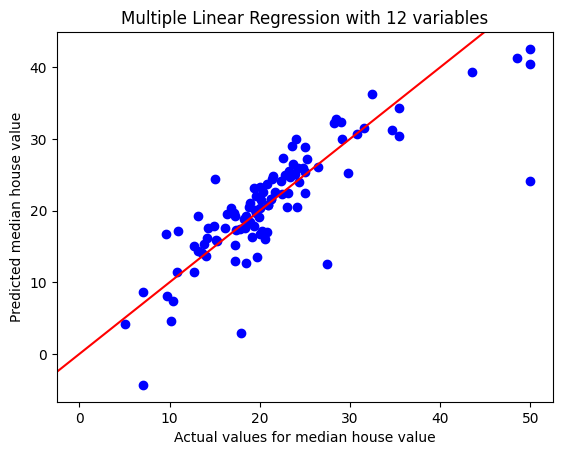

In [ ]:
# Plot predicted vs actual
plt.scatter(y_all_test, predictions_all, color="blue")
plt.axline((0, 0), slope=1, color="red") # You draw a line starting from x=0 and y=0
plt.xlabel("Actual values for median house value")
plt.ylabel("Predicted median house value")
plt.title("Multiple Linear Regression with 12 variables")
plt.show()

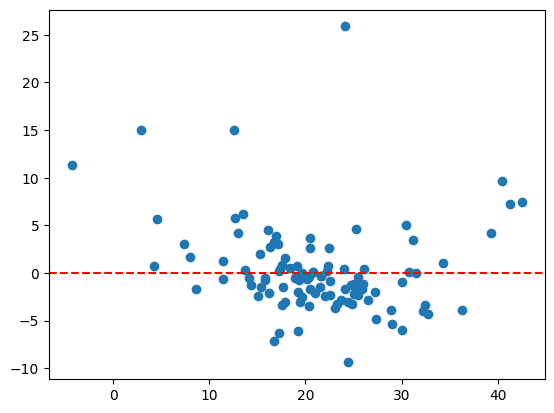

In [ ]:
plt.scatter(predictions_all, residuals_all)
plt.axhline(0, color='red', linestyle='--')

In [380]:
# Add constant (intercept) term
X_all_int = sm.add_constant(X_all)

# Fit linear regression model
model_all_inference = sm.OLS(y_all, X_all_int).fit()

# --- Hypothesis testing & p-values ---
# Null hypothesis (H0) for each coefficient: coefficient = 0 (no effect)
# Alternative hypothesis (H1): coefficient ≠ 0 (has effect)

# Show summary
summary = model_all_inference.summary()
print(summary)

# If you want to extract just p-values:
print("\nP-values for each predictor:")
print(model_all_inference.pvalues)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.6
Date:                Wed, 17 Sep 2025   Prob (F-statistic):          2.10e-133
Time:                        16:08:54   Log-Likelihood:                -1504.8
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.5974      4.935      8.429      0.0